In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#np.set_printoptions(threshold=np.nan)
pd.options.display.max_columns = None

EXPLORE MERGED AND COMBINED DATASET

In [3]:
superframe=pd.read_csv('C:/Users/jpano/Documents/DACourse/CSDA1050/Capstone/Datasets/superframe.csv')

FileNotFoundError: File b'C:/Users/jpano/Documents/DACourse/CSDA1050/Capstone/Datasets/superframe.csv' does not exist

In [ ]:
superframe.shape

In [ ]:
superframe.nunique()

In [ ]:
superframe.head()

In [ ]:
#Target variable
freq_table_1 = pd.Series(superframe['good']).value_counts()
print(freq_table_1)
freq_table_1/freq_table_1.sum()

In [ ]:
superframe.isnull().sum()

In [ ]:
superframe.dtypes

EXPLORE NUMERIC ATTRIBUTES

In [ ]:
num_cols = superframe[['total_30_day_fill_count','total_claim_count','total_day_supply','total_drug_cost']]
num_cols.describe()

In [ ]:
#box plots
import seaborn as sns
fig = plt.figure(figsize=(10,10))
sns.boxplot(data=num_cols)


In [ ]:
#histograms
num_cols.hist()
#not normal distributions & presence of outliers

In [ ]:
corr = num_cols.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

EXPLORE CATEGORICAL VARIABLES

In [ ]:
#filter into 2 separate dfs for good and bad in order to compare visualizations between the groups
goodtotal=superframe[superframe['good']==1] #not on excluded list
badtotal=superframe[superframe['good']==0] #on excluded list

In [ ]:
#Next we look at specialty_description w.r.t. our Target Variable "good"
crosstab1=pd.crosstab(superframe.specialty_description, superframe.good, margins=True, normalize='index')

In [ ]:
crosstab1.plot.bar(stacked=True, figsize=(30,20));  #too hard to read with all specialties shown - how to show only top 10????

In [ ]:
crosstab2=pd.crosstab(superframe.nppes_provider_state, superframe.good, margins=True, normalize='index')
crosstab2.plot.bar(stacked=True, figsize=(30,20));  #too hard to read with all specialties shown - how to show only top 10????

COUNT OF SPECIALTY

In [4]:
freq_table_1a = pd.Series(badtotal['specialty_description']).value_counts()
freq_table_1a.sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('Specialty Description per Medicare Part D Prescriptions')
plt.ylabel('Count')
plt.title('Specialities Associated with Excluded Practitioners')

NameError: name 'badtotal' is not defined

In [5]:
freq_table_1b = pd.Series(badtotal['SPECIALTY']).value_counts()
freq_table_1b.sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('Specialty per LEIE')
plt.ylabel('Count of Prescriptions')
plt.title('Specialities Associated with Excluded Practitioners')

NameError: name 'badtotal' is not defined

In [6]:
freq_table_1c = pd.Series(goodtotal['specialty_description']).value_counts()
freq_table_1c.sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('Specialty Description per Medicare Part D Prescriptions')
plt.ylabel('Count')
plt.title('Specialities Associated with Non-Excluded Practitioners')

NameError: name 'goodtotal' is not defined

COUNT OF STATE

In [7]:
freq_table_2a = pd.Series(badtotal['STATE']).value_counts()
freq_table_2a.sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Count of Prescriptions')
plt.title('States Associated with Excluded Practitioners')
#most in Florida

NameError: name 'badtotal' is not defined

In [8]:
freq_table_2b = pd.Series(goodtotal['nppes_provider_state']).value_counts()
freq_table_2b.sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Count of Prescriptions')
plt.title('States Associated with Non-Excluded Practitioners')
#most in California

NameError: name 'goodtotal' is not defined

COUNT OF PEOPLE

In [9]:
badtotal["first_last"]=badtotal["FIRSTNAME"]+badtotal["LASTNAME"]

NameError: name 'badtotal' is not defined

In [10]:
goodtotal["first_last"]=goodtotal["nppes_provider_first_name"]+goodtotal["nppes_provider_last_org_name"]

NameError: name 'goodtotal' is not defined

In [11]:
freq_table_3a = pd.Series(badtotal['first_last']).value_counts()
freq_table_3a.sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('Practitioner')
plt.ylabel('Count of Prescriptions')
plt.title('Excluded Practitioners')

NameError: name 'badtotal' is not defined

In [12]:
freq_table_3b = pd.Series(goodtotal['first_last']).value_counts()
freq_table_3b.sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('Practitioner')
plt.ylabel('Count of Prescriptions')
plt.title('Non-Excluded Practitioners')

NameError: name 'goodtotal' is not defined

COUNT OF DRUG NAME

In [13]:
freq_table_4a = pd.Series(badtotal['drug_name']).value_counts()
freq_table_4a.sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('Drug')
plt.ylabel('Count of Prescriptions')
plt.title('Prescribed Drugs of Excluded Practitioners')

NameError: name 'badtotal' is not defined

In [14]:
freq_table_4b = pd.Series(goodtotal['drug_name']).value_counts()
freq_table_4b.sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('Drug')
plt.ylabel('Count of Prescriptions')
plt.title('Prescribed Drugs of Non-Excluded Practitioners')

NameError: name 'goodtotal' is not defined

COUNT OF ACTIVE INGREDIENT

In [15]:
freq_table_5a = pd.Series(badtotal['ActiveIngredient']).value_counts()
freq_table_5a.sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('Active Ingredient')
plt.ylabel('Count of Prescriptions')
plt.title('Active Ingredient in Drugs Prescribed by Excluded Practitioners')

NameError: name 'badtotal' is not defined

NameError: name 'freq_table_5a' is not defined

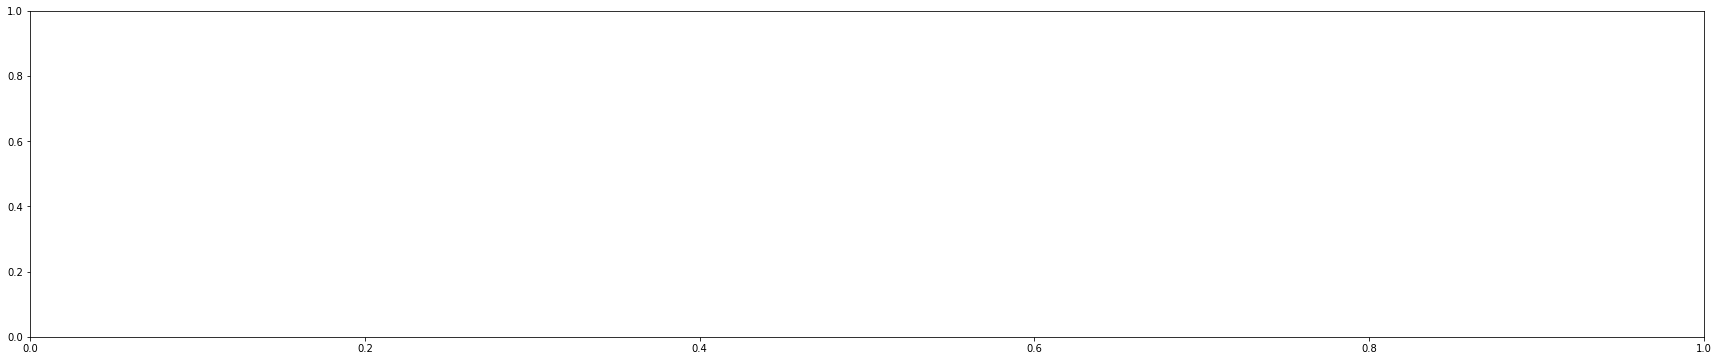

In [16]:
import statsmodels.graphics.mosaicplot as mp
fig = plt.figure(figsize=(30,6))
ax = fig.add_subplot(111)
mp.mosaic(freq_table_5a.sort_values(ascending=False)[:5], ax=ax);

In [ ]:
freq_table_5b = pd.Series(goodtotal['ActiveIngredient']).value_counts()
freq_table_5b.sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel('Active Ingredient')
plt.ylabel('Count of Prescriptions')
plt.title('Active Ingredient in Drugs Prescribed by Non-Excluded Practitioners')

GOOD VS BAD OVER TIME

In [17]:
crosstab_1 = pd.crosstab(superframe.infoYear, superframe.good, margins=True, normalize='index')
crosstab_1.plot.bar()

NameError: name 'superframe' is not defined

EXPLORE THE COLLAPSED DATASET

In [100]:
df_new=pd.read_csv('/Users/ed/Google Drive/CSDA_1050/Data/DataCollaspedbyGenericPerDoctor.csv')

/Users/ed/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [101]:
df_new.shape

(78231, 30)

In [102]:
freq_table = pd.Series(df_new['good']).value_counts()
print(freq_table)
freq_table/freq_table.sum()

1    54526
0    23705
Name: good, dtype: int64


1    0.696987
0    0.303013
Name: good, dtype: float64

In [103]:
num_cols2 = df_new[['total_30_day_fill_count','total_claim_count','total_day_supply','total_drug_cost']]
num_cols2.describe()

,total_30_day_fill_count,total_claim_count,total_day_supply,total_drug_cost
count,78231.000000,78231.000000,78231.000000,7.823100e+04
mean,101.235192,77.432591,2816.345873,6.102306e+03
std,263.986118,225.793414,7456.676878,4.546181e+04
min,11.000000,11.000000,9.000000,1.200000e-01
25%,19.000000,15.000000,450.000000,2.869400e+02
50%,37.000000,28.000000,990.000000,8.461500e+02
75%,88.100000,66.000000,2460.000000,3.136255e+03
max,15757.600000,15745.000000,434728.000000,4.664741e+06


MISSING VALUES

In [104]:
df_new.isnull().sum()

npi                                 0
generic_name                        0
ADDRESS                         54526
ActiveIngredient                72404
BUSNAME                         78231
DOB                             54526
DrugName                        72404
EXCLDATE                        54526
EXCLTYPE                        54526
GENERAL                         54526
REINDATE                        54526
WAIVERDATE                      54526
WVRSTATE                        77964
ZIP                             54526
description_flag                    0
drug_name                           0
generic_name.1                      0
good                                0
infoYear                            0
key                              3011
npi.1                               0
nppes_provider_city                 3
nppes_provider_first_name        2305
nppes_provider_last_org_name      703
nppes_provider_state                0
specialty_description               0
total_30_day

In [105]:
!pip install missingno

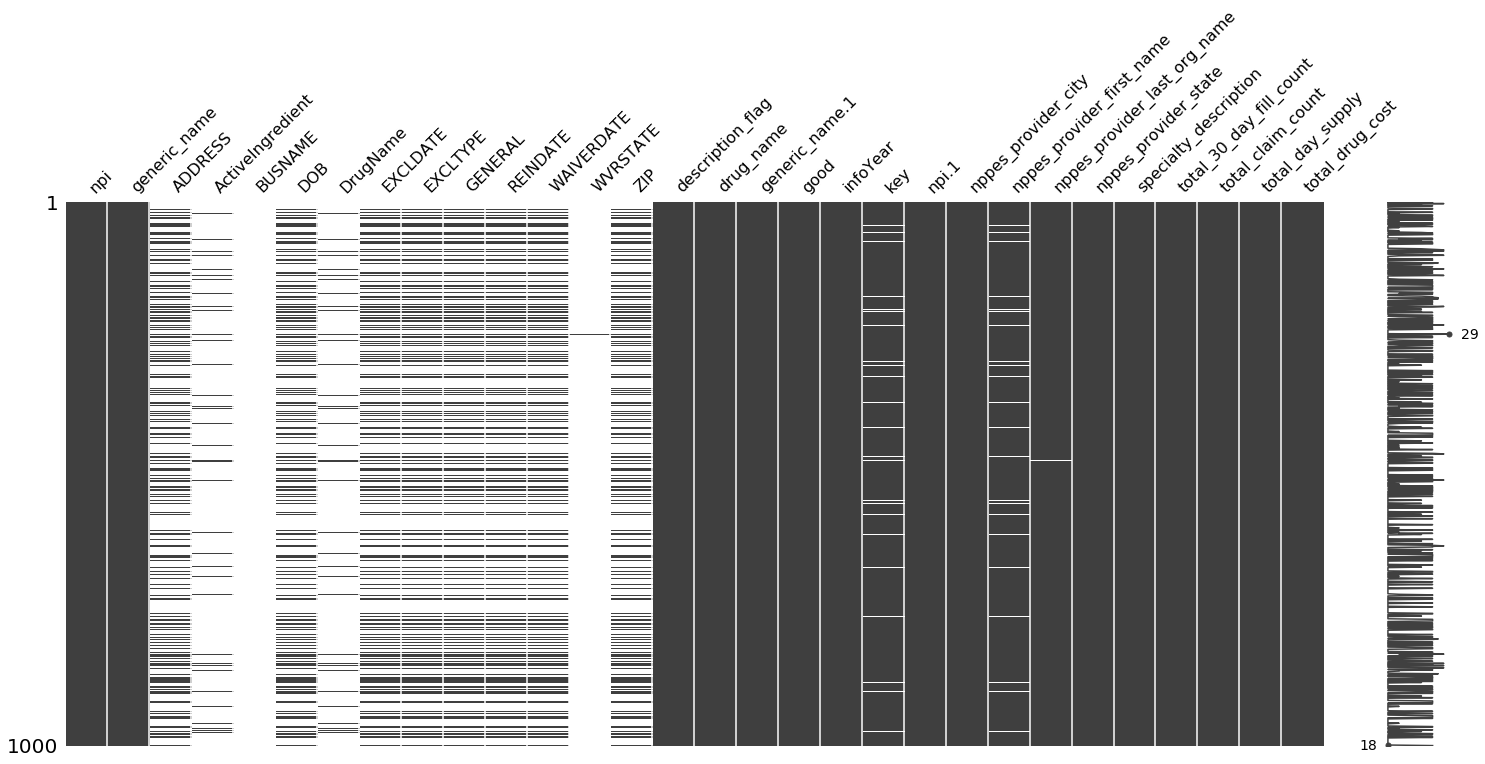

In [106]:
import missingno as msno
msno.matrix(df_new.sample(1000))

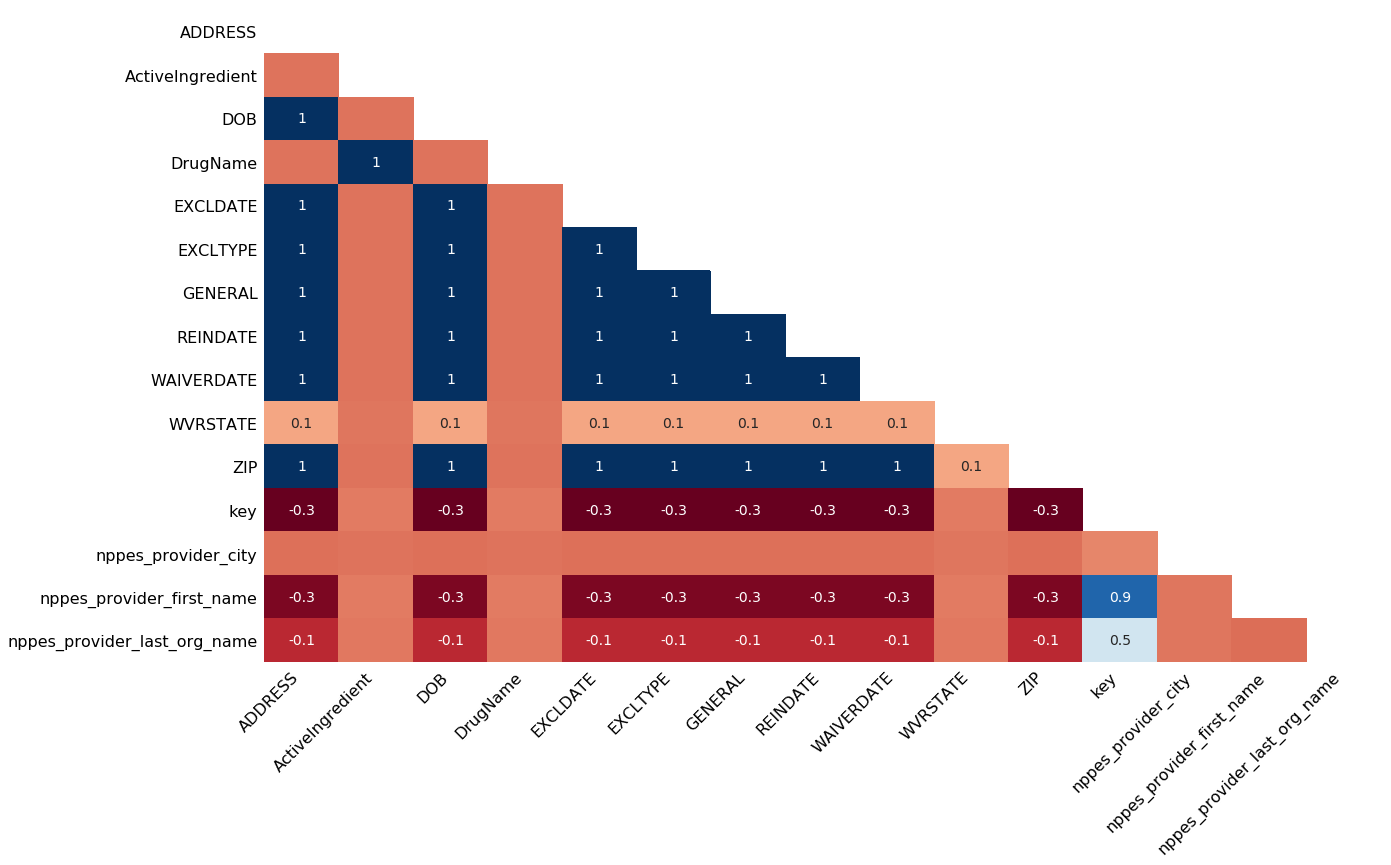

In [107]:
msno.heatmap(df_new)

In [108]:
df_new1=df_new.dropna(subset=['key'])

In [109]:
df_new1.shape

(75220, 30)

In [110]:
df_new1['REINDATE'].isnull().sum()

54526

In [111]:
(df_new1['REINDATE'] == 0).sum(axis=0)

20694

In [112]:
df_new1['WAIVERDATE'].isnull().sum()

54526

In [113]:
(df_new1['WAIVERDATE'] == 0).sum(axis=0)

20427

In [114]:
df_new1['WVRSTATE'].isnull().sum()

74953

### drop other variables

In [115]:
df_new2=df_new1.drop(['DrugName','npi.1','generic_name.1','REINDATE','WAIVERDATE','WVRSTATE', 'BUSNAME',
                      'ADDRESS','key','DOB','EXCLDATE','EXCLTYPE','GENERAL','ZIP','description_flag',
                      'nppes_provider_first_name','nppes_provider_last_org_name'],axis='columns')

In [116]:
df_new2.shape

(75220, 13)

In [117]:
#check what is still missing
df_new2.isnull().sum()

npi                            0
generic_name                   0
ActiveIngredient           69576
drug_name                      0
good                           0
infoYear                       0
nppes_provider_city            0
nppes_provider_state           0
specialty_description          0
total_30_day_fill_count        0
total_claim_count              0
total_day_supply               0
total_drug_cost                0
dtype: int64

In [118]:
num_cols2 = df_new2[['total_30_day_fill_count','total_claim_count','total_day_supply','total_drug_cost']]
num_cols2.describe()

,total_30_day_fill_count,total_claim_count,total_day_supply,total_drug_cost
count,75220.000000,75220.000000,75220.000000,7.522000e+04
mean,102.359658,78.611779,2847.879673,6.222307e+03
std,265.766974,228.879225,7496.371076,4.623743e+04
min,11.000000,11.000000,9.000000,1.200000e-01
25%,19.000000,16.000000,470.000000,2.968375e+02
50%,38.000000,29.000000,1020.000000,8.685000e+02
75%,90.000000,68.000000,2502.000000,3.201360e+03
max,15757.600000,15745.000000,434728.000000,4.664741e+06


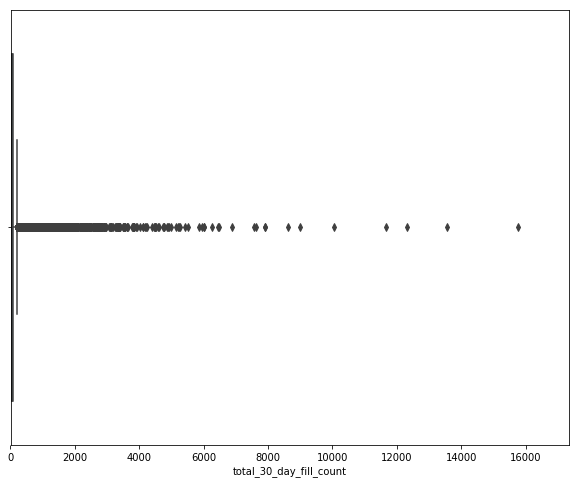

In [119]:
i = 'total_30_day_fill_count'
df=df_new2
plt.figure(figsize=(10,8))
plt.xlim(df[i].min(), df[i].max()*1.1)
sns.boxplot(x=df[i])

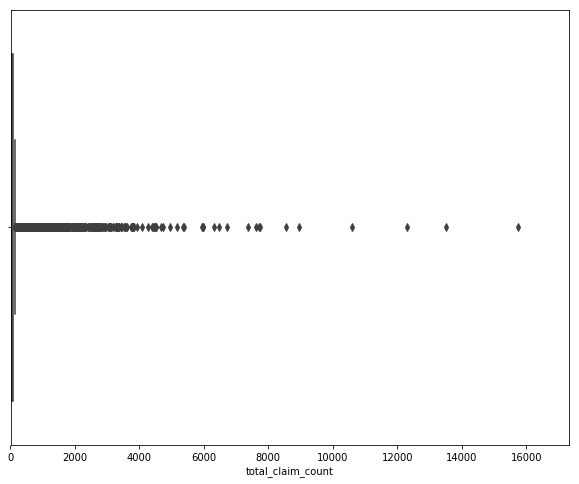

In [120]:
j = 'total_claim_count'
df=df_new2
plt.figure(figsize=(10,8))
plt.xlim(df[j].min(), df[j].max()*1.1)
sns.boxplot(x=df[j])

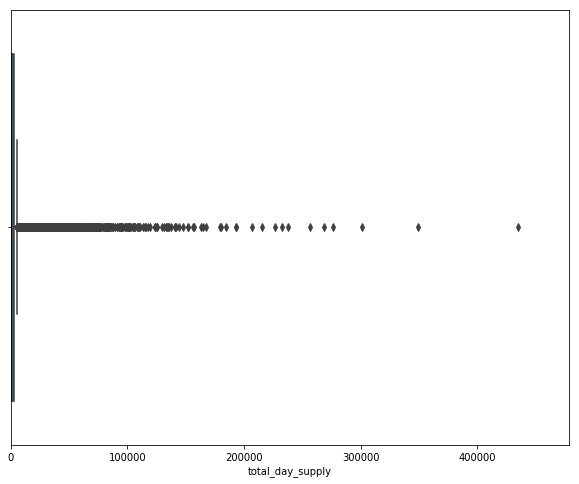

In [121]:
k = 'total_day_supply'
df=df_new2
plt.figure(figsize=(10,8))
plt.xlim(df[k].min(), df[k].max()*1.1)
sns.boxplot(x=df[k])

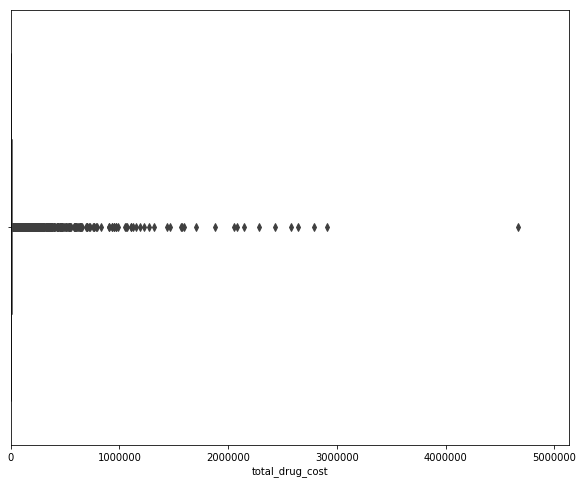

In [122]:
l = 'total_drug_cost'
df=df_new2
plt.figure(figsize=(10,8))
plt.xlim(df[l].min(), df[l].max()*1.1)
sns.boxplot(x=df[l])

In [123]:
df_new2.dtypes

npi                          int64
generic_name                object
ActiveIngredient            object
drug_name                   object
good                         int64
infoYear                     int64
nppes_provider_city         object
nppes_provider_state        object
specialty_description       object
total_30_day_fill_count    float64
total_claim_count            int64
total_day_supply             int64
total_drug_cost            float64
dtype: object

In [124]:
# convert to correct data types
#df_new2['DOB']=pd.to_datetime(df_new2['DOB'].astype(str),format='%Y%m%d')
#df_new2['EXCLDATE']=pd.to_datetime(df_new2['EXCLDATE'].astype(str),format='%Y%m%d')

In [125]:
#check conversion is correct
#(df_new2['EXCLDATE'].tail())
#(df_new2['DOB'].tail())

In [126]:
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75220 entries, 0 to 78230
Data columns (total 13 columns):
npi                        75220 non-null int64
generic_name               75220 non-null object
ActiveIngredient           5644 non-null object
drug_name                  75220 non-null object
good                       75220 non-null int64
infoYear                   75220 non-null int64
nppes_provider_city        75220 non-null object
nppes_provider_state       75220 non-null object
specialty_description      75220 non-null object
total_30_day_fill_count    75220 non-null float64
total_claim_count          75220 non-null int64
total_day_supply           75220 non-null int64
total_drug_cost            75220 non-null float64
dtypes: float64(2), int64(5), object(6)
memory usage: 8.0+ MB


In [127]:
df_new2.nunique()

npi                         2412
generic_name                1025
ActiveIngredient             193
drug_name                   1414
good                           2
infoYear                       4
nppes_provider_city         1157
nppes_provider_state          53
specialty_description         89
total_30_day_fill_count     5319
total_claim_count           1337
total_day_supply           10646
total_drug_cost            65886
dtype: int64

In [128]:
df_new2.head()

,npi,generic_name,ActiveIngredient,drug_name,good,infoYear,nppes_provider_city,nppes_provider_state,specialty_description,total_30_day_fill_count,total_claim_count,total_day_supply,total_drug_cost
0,1003001868,AMOXICILLIN,NaN,AMOXICILLIN,1,13,HARRISBURG,NC,Dentist,34.0,34,125,127.86
6,1003076159,AZITHROMYCIN,NaN,AZITHROMYCIN,1,13,BROOMFIELD,CO,Internal Medicine,12.0,12,221,174.80
7,1003076159,FLUTICASONE PROPIONATE,NaN,FLUTICASONE PROPIONATE,1,13,BROOMFIELD,CO,Internal Medicine,18.0,14,534,350.84
8,1003076159,FLUTICASONE/SALMETEROL,NaN,ADVAIR DISKUS,1,13,BROOMFIELD,CO,Internal Medicine,18.0,13,540,5442.04
9,1003076159,PREDNISONE,NaN,PREDNISONE,1,13,BROOMFIELD,CO,Internal Medicine,12.4,12,157,61.51


In [129]:
#check proportion of good and bad in the resulting data

freq_table_2 = pd.Series(df_new2['good']).value_counts()
print(freq_table_2)
freq_table_2/freq_table_2.sum()

1    54526
0    20694
Name: good, dtype: int64


1    0.724887
0    0.275113
Name: good, dtype: float64

In [130]:
#change the target variable so that fraud = 1 and non-fraud = 0 -> don't rerun this
df_new2['fraud']=(df_new2['good']-1)*-1

In [131]:
df_new2=df_new2.drop(['good'],axis=1)

In [132]:
df_new2.head()

,npi,generic_name,ActiveIngredient,drug_name,infoYear,nppes_provider_city,nppes_provider_state,specialty_description,total_30_day_fill_count,total_claim_count,total_day_supply,total_drug_cost,fraud
0,1003001868,AMOXICILLIN,NaN,AMOXICILLIN,13,HARRISBURG,NC,Dentist,34.0,34,125,127.86,0
6,1003076159,AZITHROMYCIN,NaN,AZITHROMYCIN,13,BROOMFIELD,CO,Internal Medicine,12.0,12,221,174.80,0
7,1003076159,FLUTICASONE PROPIONATE,NaN,FLUTICASONE PROPIONATE,13,BROOMFIELD,CO,Internal Medicine,18.0,14,534,350.84,0
8,1003076159,FLUTICASONE/SALMETEROL,NaN,ADVAIR DISKUS,13,BROOMFIELD,CO,Internal Medicine,18.0,13,540,5442.04,0
9,1003076159,PREDNISONE,NaN,PREDNISONE,13,BROOMFIELD,CO,Internal Medicine,12.4,12,157,61.51,0


In [133]:
freq_table_2 = pd.Series(df_new2['fraud']).value_counts()
print(freq_table_2)

0    54526
1    20694
Name: fraud, dtype: int64


In [134]:
df_new2.shape

(75220, 13)

### ENCODING

In [135]:
encoded_df=df_new2

In [136]:
encoded_df.head()

,npi,generic_name,ActiveIngredient,drug_name,infoYear,nppes_provider_city,nppes_provider_state,specialty_description,total_30_day_fill_count,total_claim_count,total_day_supply,total_drug_cost,fraud
0,1003001868,AMOXICILLIN,NaN,AMOXICILLIN,13,HARRISBURG,NC,Dentist,34.0,34,125,127.86,0
6,1003076159,AZITHROMYCIN,NaN,AZITHROMYCIN,13,BROOMFIELD,CO,Internal Medicine,12.0,12,221,174.80,0
7,1003076159,FLUTICASONE PROPIONATE,NaN,FLUTICASONE PROPIONATE,13,BROOMFIELD,CO,Internal Medicine,18.0,14,534,350.84,0
8,1003076159,FLUTICASONE/SALMETEROL,NaN,ADVAIR DISKUS,13,BROOMFIELD,CO,Internal Medicine,18.0,13,540,5442.04,0
9,1003076159,PREDNISONE,NaN,PREDNISONE,13,BROOMFIELD,CO,Internal Medicine,12.4,12,157,61.51,0


In [137]:
encoded_df.isnull().sum()

npi                            0
generic_name                   0
ActiveIngredient           69576
drug_name                      0
infoYear                       0
nppes_provider_city            0
nppes_provider_state           0
specialty_description          0
total_30_day_fill_count        0
total_claim_count              0
total_day_supply               0
total_drug_cost                0
fraud                          0
dtype: int64

In [138]:
#fill missing values with zeros 
#encoded_df['ActiveIngredient']=encoded_df["ActiveIngredient"].fillna("0")
#encoded_df['DOB']=encoded_df["DOB"].fillna("0")
#encoded_df["EXCLDATE"]=encoded_df["EXCLDATE"].fillna("0")
#encoded_df["EXCLTYPE"]=encoded_df["EXCLTYPE"].fillna("0")
#encoded_df["GENERAL"]=encoded_df["GENERAL"].fillna("0")
#encoded_df["ZIP"]=encoded_df["ZIP"].fillna("0")

In [139]:
encoded_df.dtypes #many objects - need to convert

npi                          int64
generic_name                object
ActiveIngredient            object
drug_name                   object
infoYear                     int64
nppes_provider_city         object
nppes_provider_state        object
specialty_description       object
total_30_day_fill_count    float64
total_claim_count            int64
total_day_supply             int64
total_drug_cost            float64
fraud                        int64
dtype: object

In [140]:
cat_cols = encoded_df.select_dtypes(['object'])
cat_cols.columns

Index(['generic_name', 'ActiveIngredient', 'drug_name', 'nppes_provider_city',
       'nppes_provider_state', 'specialty_description'],
      dtype='object')

In [141]:
#factorize the categorical vars
label_mapping = {}

for c in cat_cols:
    encoded_df[c+"X"], label_mapping[c+"X"] = pd.factorize(encoded_df[c])

In [142]:
encoded_df.tail(2000)

,npi,generic_name,ActiveIngredient,drug_name,infoYear,nppes_provider_city,nppes_provider_state,specialty_description,total_30_day_fill_count,total_claim_count,total_day_supply,total_drug_cost,fraud,generic_nameX,ActiveIngredientX,drug_nameX,nppes_provider_cityX,nppes_provider_stateX,specialty_descriptionX
76182,1972533651,ORPHENADRINE CITRATE,NaN,ORPHENADRINE CITRATE,13,KNOXVILLE,TN,Nurse Practitioner,11.0,11,80,120.42,1,554,-1,655,205,21,4
76183,1972539682,ACETAMINOPHEN WITH CODEINE,NaN,ACETAMINOPHEN-CODEINE,14,ELMHURST,IL,Emergency Medicine,13.0,13,46,72.77,0,143,-1,147,336,20,11
76184,1972539682,AZITHROMYCIN,NaN,AZITHROMYCIN,14,ELMHURST,IL,Emergency Medicine,16.0,16,80,116.98,0,1,-1,1,336,20,11
76185,1972539682,HYDROCODONE/ACETAMINOPHEN,NaN,HYDROCODONE-ACETAMINOPHEN,14,ELMHURST,IL,Emergency Medicine,19.0,19,68,145.07,0,8,-1,8,336,20,11
76186,1972539682,TRAMADOL HCL,NaN,TRAMADOL HCL,14,ELMHURST,IL,Emergency Medicine,14.0,14,62,44.13,0,22,-1,22,336,20,11
76187,1972541936,ABACAVIR SULFATE,NaN,ABACAVIR,13,CARMEL,IN,Infectious Disease,12.0,12,360,4908.97,0,830,-1,1081,757,8,65
76188,1972541936,ABACAVIR SULFATE/LAMIVUDINE,ABACAVIR SULFATE; LAMIVUDINE,EPZICOM,13,CARMEL,IN,Infectious Disease,42.0,42,1260,44147.02,0,267,28,288,757,8,65
76189,1972541936,ATAZANAVIR SULFATE,NaN,REYATAZ,13,CARMEL,IN,Infectious Disease,38.0,30,1140,41979.06,0,268,-1,289,757,8,65
76190,1972541936,AZITHROMYCIN,NaN,AZITHROMYCIN,13,CARMEL,IN,Infectious Disease,14.0,14,329,477.15,0,1,-1,1,757,8,65
76191,1972541936,CEFTRIAXONE SODIUM,NaN,CEFTRIAXONE,13,CARMEL,IN,Infectious Disease,12.0,12,80,5577.17,0,321,-1,344,757,8,65


In [143]:
print (encoded_df.dtypes)
print (encoded_df.nunique())

npi                          int64
generic_name                object
ActiveIngredient            object
drug_name                   object
infoYear                     int64
nppes_provider_city         object
nppes_provider_state        object
specialty_description       object
total_30_day_fill_count    float64
total_claim_count            int64
total_day_supply             int64
total_drug_cost            float64
fraud                        int64
generic_nameX                int64
ActiveIngredientX            int64
drug_nameX                   int64
nppes_provider_cityX         int64
nppes_provider_stateX        int64
specialty_descriptionX       int64
dtype: object
npi                         2412
generic_name                1025
ActiveIngredient             193
drug_name                   1414
infoYear                       4
nppes_provider_city         1157
nppes_provider_state          53
specialty_description         89
total_30_day_fill_count     5319
total_claim_count       

In [144]:
encoded_df.shape

(75220, 19)

In [145]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(df_new2,alpha=0.2,figsize=(12,12),diagonal='kde')

In [146]:
#make balanced dataset
freq_fraud1=encoded_df[encoded_df.fraud==1]
freq_fraud0=encoded_df[encoded_df.fraud==0]
freq_fraud0=freq_fraud0.iloc[:41388,]
freq_fraud1=pd.concat([freq_fraud1,freq_fraud1])
encoded_df=pd.concat([freq_fraud0,freq_fraud1])

In [147]:
encoded_df.head()

,npi,generic_name,ActiveIngredient,drug_name,infoYear,nppes_provider_city,nppes_provider_state,specialty_description,total_30_day_fill_count,total_claim_count,total_day_supply,total_drug_cost,fraud,generic_nameX,ActiveIngredientX,drug_nameX,nppes_provider_cityX,nppes_provider_stateX,specialty_descriptionX
0,1003001868,AMOXICILLIN,NaN,AMOXICILLIN,13,HARRISBURG,NC,Dentist,34.0,34,125,127.86,0,0,-1,0,0,0,0
6,1003076159,AZITHROMYCIN,NaN,AZITHROMYCIN,13,BROOMFIELD,CO,Internal Medicine,12.0,12,221,174.80,0,1,-1,1,1,1,1
7,1003076159,FLUTICASONE PROPIONATE,NaN,FLUTICASONE PROPIONATE,13,BROOMFIELD,CO,Internal Medicine,18.0,14,534,350.84,0,2,-1,2,1,1,1
8,1003076159,FLUTICASONE/SALMETEROL,NaN,ADVAIR DISKUS,13,BROOMFIELD,CO,Internal Medicine,18.0,13,540,5442.04,0,3,-1,3,1,1,1
9,1003076159,PREDNISONE,NaN,PREDNISONE,13,BROOMFIELD,CO,Internal Medicine,12.4,12,157,61.51,0,4,-1,4,1,1,1


In [148]:
encoded_df.shape

(82776, 19)

In [159]:
encoded_df[encoded_df["specialty_descriptionX"]<=12.5]

,npi,generic_name,ActiveIngredient,drug_name,infoYear,nppes_provider_city,nppes_provider_state,specialty_description,total_30_day_fill_count,total_claim_count,total_day_supply,total_drug_cost,fraud,generic_nameX,ActiveIngredientX,drug_nameX,nppes_provider_cityX,nppes_provider_stateX,specialty_descriptionX
0,1003001868,AMOXICILLIN,NaN,AMOXICILLIN,13,HARRISBURG,NC,Dentist,34.0,34,125,127.86,0,0,-1,0,0,0,0
6,1003076159,AZITHROMYCIN,NaN,AZITHROMYCIN,13,BROOMFIELD,CO,Internal Medicine,12.0,12,221,174.80,0,1,-1,1,1,1,1
7,1003076159,FLUTICASONE PROPIONATE,NaN,FLUTICASONE PROPIONATE,13,BROOMFIELD,CO,Internal Medicine,18.0,14,534,350.84,0,2,-1,2,1,1,1
8,1003076159,FLUTICASONE/SALMETEROL,NaN,ADVAIR DISKUS,13,BROOMFIELD,CO,Internal Medicine,18.0,13,540,5442.04,0,3,-1,3,1,1,1
9,1003076159,PREDNISONE,NaN,PREDNISONE,13,BROOMFIELD,CO,Internal Medicine,12.4,12,157,61.51,0,4,-1,4,1,1,1
10,1003080953,AMOXICILLIN,NaN,AMOXICILLIN,15,TAMPA,FL,Dentist,17.0,17,157,124.99,0,0,-1,0,2,2,0
11,1003080953,DOXYCYCLINE HYCLATE,NaN,DOXYCYCLINE HYCLATE,15,TAMPA,FL,Dentist,18.0,14,510,833.97,0,5,-1,5,2,2,0
12,1003151820,DIAZEPAM,NaN,DIAZEPAM,13,RALEIGH,NC,Physician Assistant,42.0,42,368,199.60,0,6,-1,6,3,0,2
13,1003151820,GABAPENTIN,NaN,GABAPENTIN,13,RALEIGH,NC,Physician Assistant,14.0,14,372,187.64,0,7,-1,7,3,0,2
14,1003151820,HYDROCODONE/ACETAMINOPHEN,NaN,HYDROCODONE-ACETAMINOPHEN,13,RALEIGH,NC,Physician Assistant,20.0,20,126,278.67,0,8,-1,8,3,0,2


## MODELLING

In [655]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn import cross_validation
from sklearn.cross_validation import KFold
from sklearn.metrics import roc_auc_score

### DECISION TREE USING ALL VARS

In [656]:
inputvar=encoded_df.drop(['fraud','npi'], axis=1)
inputvar.head()

,generic_name,ActiveIngredient,drug_name,infoYear,nppes_provider_city,nppes_provider_state,specialty_description,total_30_day_fill_count,total_claim_count,total_day_supply,total_drug_cost,generic_nameX,ActiveIngredientX,drug_nameX,nppes_provider_cityX,nppes_provider_stateX,specialty_descriptionX
0,AMOXICILLIN,NaN,AMOXICILLIN,13,HARRISBURG,NC,Dentist,34.0,34,125,127.86,0,-1,0,0,0,0
6,AZITHROMYCIN,NaN,AZITHROMYCIN,13,BROOMFIELD,CO,Internal Medicine,12.0,12,221,174.80,1,-1,1,1,1,1
7,FLUTICASONE PROPIONATE,NaN,FLUTICASONE PROPIONATE,13,BROOMFIELD,CO,Internal Medicine,18.0,14,534,350.84,2,-1,2,1,1,1
8,FLUTICASONE/SALMETEROL,NaN,ADVAIR DISKUS,13,BROOMFIELD,CO,Internal Medicine,18.0,13,540,5442.04,3,-1,3,1,1,1
9,PREDNISONE,NaN,PREDNISONE,13,BROOMFIELD,CO,Internal Medicine,12.4,12,157,61.51,4,-1,4,1,1,1


In [689]:
inputvar[inputvar.nppes_provider_stateX<11]

,generic_name,ActiveIngredient,drug_name,infoYear,nppes_provider_city,nppes_provider_state,specialty_description,total_30_day_fill_count,total_claim_count,total_day_supply,total_drug_cost,generic_nameX,ActiveIngredientX,drug_nameX,nppes_provider_cityX,nppes_provider_stateX,specialty_descriptionX
0,AMOXICILLIN,NaN,AMOXICILLIN,13,HARRISBURG,NC,Dentist,34.0,34,125,127.86,0,-1,0,959,0,0
6,AZITHROMYCIN,NaN,AZITHROMYCIN,13,BROOMFIELD,CO,Internal Medicine,12.0,12,221,174.80,1,-1,1,959,1,1
7,FLUTICASONE PROPIONATE,NaN,FLUTICASONE PROPIONATE,13,BROOMFIELD,CO,Internal Medicine,18.0,14,534,350.84,2,-1,2,959,1,1
8,FLUTICASONE/SALMETEROL,NaN,ADVAIR DISKUS,13,BROOMFIELD,CO,Internal Medicine,18.0,13,540,5442.04,3,-1,3,959,1,1
9,PREDNISONE,NaN,PREDNISONE,13,BROOMFIELD,CO,Internal Medicine,12.4,12,157,61.51,4,-1,4,959,1,1
10,AMOXICILLIN,NaN,AMOXICILLIN,15,TAMPA,FL,Dentist,17.0,17,157,124.99,0,-1,0,959,2,0
11,DOXYCYCLINE HYCLATE,NaN,DOXYCYCLINE HYCLATE,15,TAMPA,FL,Dentist,18.0,14,510,833.97,5,-1,5,959,2,0
12,DIAZEPAM,NaN,DIAZEPAM,13,RALEIGH,NC,Physician Assistant,42.0,42,368,199.60,6,-1,6,959,0,2
13,GABAPENTIN,NaN,GABAPENTIN,13,RALEIGH,NC,Physician Assistant,14.0,14,372,187.64,7,-1,7,959,0,2
14,HYDROCODONE/ACETAMINOPHEN,NaN,HYDROCODONE-ACETAMINOPHEN,13,RALEIGH,NC,Physician Assistant,20.0,20,126,278.67,8,-1,8,959,0,2


In [678]:
targetvar=encoded_df['fraud']
targetvar.head()

0    0
6    0
7    0
8    0
9    0
Name: fraud, dtype: int64

In [658]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(inputvar, targetvar, test_size=0.3)

In [659]:
freq_table_ytrain = pd.Series(y_train).value_counts()
print(freq_table_ytrain)

1    28975
0    28968
Name: fraud, dtype: int64


In [660]:
X_train.head()

,generic_name,ActiveIngredient,drug_name,infoYear,nppes_provider_city,nppes_provider_state,specialty_description,total_30_day_fill_count,total_claim_count,total_day_supply,total_drug_cost,generic_nameX,ActiveIngredientX,drug_nameX,nppes_provider_cityX,nppes_provider_stateX,specialty_descriptionX
50895,CLONIDINE HCL,NaN,CLONIDINE HCL,13,ISABELA,PR,General Practice,27.0,27,705,165.91,33,-1,33,871,41,8
74101,IPRATROPIUM/ALBUTEROL SULFATE,ALBUTEROL SULFATE; IPRATROPIUM BROMIDE,COMBIVENT,13,SAINT LOUIS,MO,Family Practice,41.0,39,1055,8882.64,188,17,195,64,5,15
43080,CLONIDINE,NaN,CLONIDINE,13,PITTSBURG,CA,Internal Medicine,23.0,23,646,3152.78,164,-1,168,777,16,1
47394,ALLOPURINOL,NaN,ALLOPURINOL,13,SIOUX CITY,IA,Family Practice,65.0,51,1931,328.84,26,-1,26,375,25,15
14811,BACLOFEN,NaN,BACLOFEN,13,CHESTERLAND,OH,Internal Medicine,16.2,16,482,201.27,134,-1,136,364,30,1


In [661]:
X_test.head()

,generic_name,ActiveIngredient,drug_name,infoYear,nppes_provider_city,nppes_provider_state,specialty_description,total_30_day_fill_count,total_claim_count,total_day_supply,total_drug_cost,generic_nameX,ActiveIngredientX,drug_nameX,nppes_provider_cityX,nppes_provider_stateX,specialty_descriptionX
21856,HYDROCODONE/ACETAMINOPHEN,NaN,HYDROCODONE-ACETAMINOPHEN,13,BROWNWOOD,TX,Neurology,107.0,107,2777,2565.62,8,-1,8,484,11,23
26757,INDOMETHACIN,NaN,INDOMETHACIN,13,CARTHAGE,MS,Family Practice,30.0,30,831,1501.16,248,-1,261,546,42,15
55146,NIFEDIPINE,NaN,NIFEDIPINE ER,13,MIAMI,FL,General Practice,94.0,66,2818,2593.88,104,-1,263,44,2,8
50644,CLONAZEPAM,NaN,CLONAZEPAM,13,FORT LAUDERDALE,FL,Internal Medicine,24.0,22,645,231.33,163,-1,167,48,2,1
49243,NIFEDIPINE,NaN,NIFEDIPINE ER,16,LOS ALAMITOS,CA,Gastroenterology,16.0,16,480,719.66,104,-1,263,857,16,6


In [662]:
#X_test.iloc[:,4].head()

In [663]:
y_train.head()

50895    0
74101    1
43080    1
47394    0
14811    1
Name: fraud, dtype: int64

In [664]:
freq_table = pd.Series(y_test).value_counts()
print(freq_table)

0    12420
1    12413
Name: fraud, dtype: int64


In [665]:
clf = tree.DecisionTreeClassifier(max_depth=5)
clf=clf.fit(X_train,y_train)

ValueError: could not convert string to float: 'General Practice'

In [666]:
dtree_prediction = clf.predict(X_test)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [667]:
dtree_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [670]:
dtree_prediction_tr = clf.predict(X_train) #to compare ROC curves on train and test

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [671]:
print(accuracy_score(y_test,dtree_prediction))

0.49748318769379457


In [672]:
print(accuracy_score(y_train,dtree_prediction_tr))

0.4984381202215971


In [325]:
print(classification_report(y_test,dtree_prediction))

             precision    recall  f1-score   support

          0       0.71      0.76      0.73     12386
          1       0.74      0.68      0.71     12447

avg / total       0.72      0.72      0.72     24833



In [326]:
print(confusion_matrix(y_test,dtree_prediction))

[[9449 2937]
 [3935 8512]]


Text(33,0.5,'Actual')

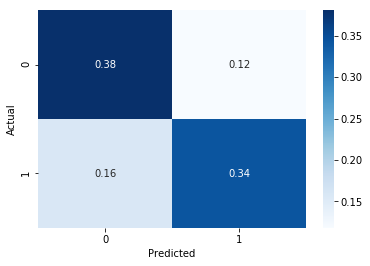

In [327]:
sns.heatmap(confusion_matrix(y_test,dtree_prediction) / len(y_test), cmap='Blues', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

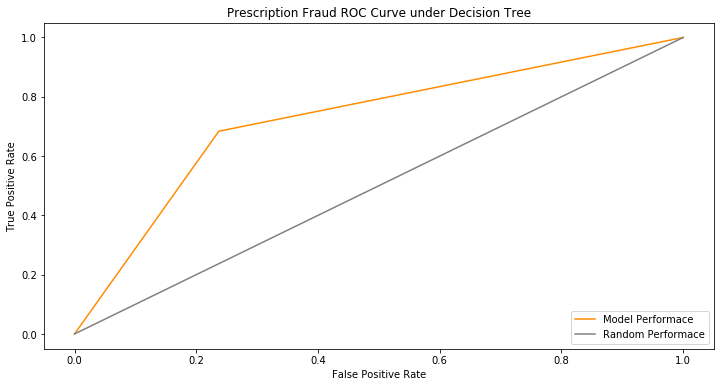

In [328]:
fpr, tpr, thresholds = roc_curve(y_test,dtree_prediction)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Prescription Fraud ROC Curve under Decision Tree')
plt.legend(loc="lower right")

In [329]:
roc_auc_score(y_test,dtree_prediction)

0.7233685034136212

In [330]:
roc_auc_score(y_train,dtree_prediction_tr)

0.716252423035748

### LOGISTIC REGRESSION USING ALL VARS AND NO LOG TRANSFORM ON NUMERIC

In [331]:
LRmodel = LogisticRegression()
LRmodel.fit(X_train,y_train) #use same train-test split as in decision tree

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [332]:
LRpred = LRmodel.predict(X_test)

In [333]:
print(accuracy_score(y_test,LRpred))

0.6129746708009504


In [334]:
print(confusion_matrix(y_test,LRpred)) 

[[8771 3615]
 [5996 6451]]


In [335]:
print(classification_report(y_test,LRpred))

             precision    recall  f1-score   support

          0       0.59      0.71      0.65     12386
          1       0.64      0.52      0.57     12447

avg / total       0.62      0.61      0.61     24833



Text(33,0.5,'Actual')

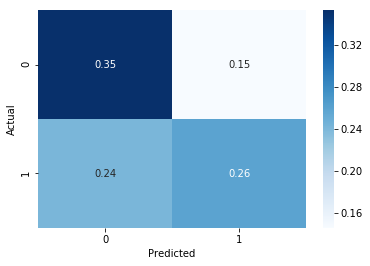

In [336]:
sns.heatmap(confusion_matrix(y_test,LRpred) / len(y_test), cmap='Blues', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

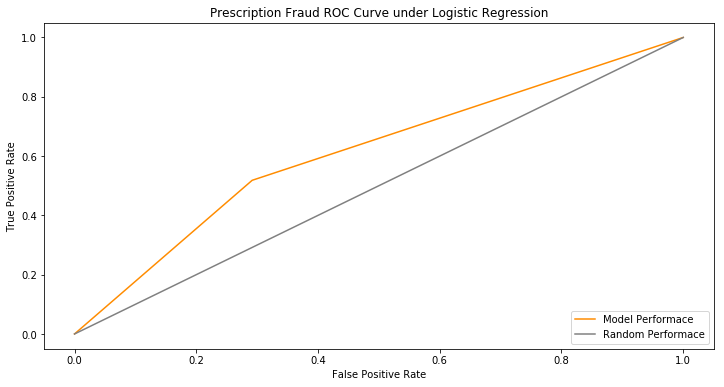

In [337]:
fpr, tpr, thresholds = roc_curve(y_test,LRpred)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Prescription Fraud ROC Curve under Logistic Regression')
plt.legend(loc="lower right")

In [338]:
roc_auc_score(y_test,LRpred)

0.6132078585785679

In [339]:
len(encoded_df)

82776

### LOGISTIC REGRESSION USING ALL VARS AND LOG TRANSFORMATION ON NUMERIC

In [340]:
inputvar2=encoded_df.drop((['fraud','npi']), axis=1)

In [341]:
inputvar2.head()

,generic_name,ActiveIngredient,drug_name,infoYear,nppes_provider_city,nppes_provider_state,specialty_description,total_30_day_fill_count,total_claim_count,total_day_supply,total_drug_cost
0,0,-1,0,13,0,0,0,34.0,34,125,127.86
6,1,-1,1,13,1,1,1,12.0,12,221,174.80
7,2,-1,2,13,1,1,1,18.0,14,534,350.84
8,3,-1,3,13,1,1,1,18.0,13,540,5442.04
9,4,-1,4,13,1,1,1,12.4,12,157,61.51


In [342]:
#log transform the numeric variables
inputvar2[['total_30_day_fill_count','total_claim_count','total_day_supply',
            'total_drug_cost']]=np.log(inputvar2[['total_30_day_fill_count','total_claim_count',
                                                   'total_day_supply','total_drug_cost']])

In [343]:
inputvar2.head() #check log transform occurred

,generic_name,ActiveIngredient,drug_name,infoYear,nppes_provider_city,nppes_provider_state,specialty_description,total_30_day_fill_count,total_claim_count,total_day_supply,total_drug_cost
0,0,-1,0,13,0,0,0,3.526361,3.526361,4.828314,4.850936
6,1,-1,1,13,1,1,1,2.484907,2.484907,5.398163,5.163642
7,2,-1,2,13,1,1,1,2.890372,2.639057,6.280396,5.860330
8,3,-1,3,13,1,1,1,2.890372,2.564949,6.291569,8.601909
9,4,-1,4,13,1,1,1,2.517696,2.484907,5.056246,4.119200


In [344]:
X_train2, X_test2, y_train2, y_test2 = cross_validation.train_test_split(inputvar2, targetvar, test_size=0.3)

In [345]:
LRmodel2 = LogisticRegression()
LRmodel2.fit(X_train2,y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [346]:
LRpred2 = LRmodel2.predict(X_test2)

In [347]:
print(accuracy_score(y_test2,LRpred2))

0.6503442999234889


In [348]:
print(confusion_matrix(y_test2,LRpred2))

[[7624 4720]
 [3963 8526]]


In [349]:
print(classification_report(y_test2,LRpred2))

             precision    recall  f1-score   support

          0       0.66      0.62      0.64     12344
          1       0.64      0.68      0.66     12489

avg / total       0.65      0.65      0.65     24833



Text(33,0.5,'Actual')

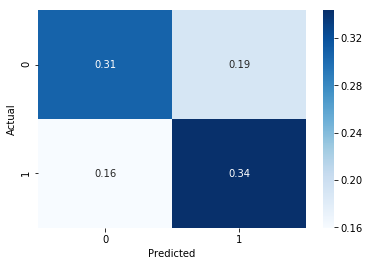

In [350]:
sns.heatmap(confusion_matrix(y_test2,LRpred2) / len(y_test2), cmap='Blues', annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

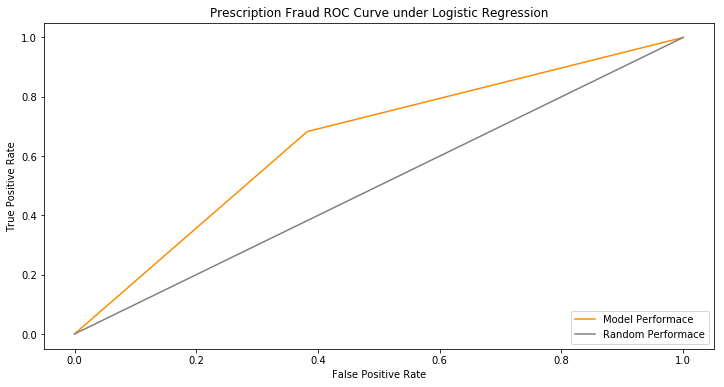

In [351]:
fpr, tpr, thresholds = roc_curve(y_test2,LRpred2)
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Prescription Fraud ROC Curve under Logistic Regression')
plt.legend(loc="lower right")